In [1]:
import numpy as np
import cv2
import glob
import os
from matplotlib import pyplot as plt
import imutils

In [2]:
os.chdir('C:\\Users\\User\\Desktop\\yuzuk\\dataset\\train')

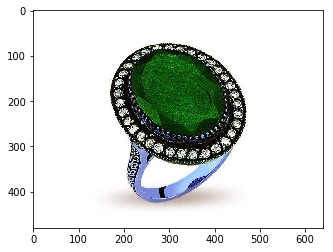

In [3]:
#first try
image = cv2.imread('1.jpg')
plt.imshow(image)
newImage = image.copy()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blurred = cv2.GaussianBlur(hsv, (3, 3), 0)

h,s,v = cv2.split(blurred)


thresh = cv2.adaptiveThreshold(h, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

if len(cnts) > 0:
    cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

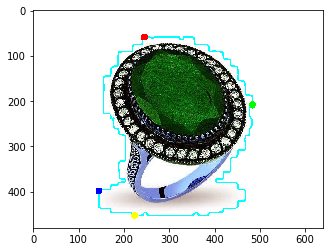

In [4]:
#second try 
image = cv2.imread('1.jpg')
plt.imshow(image)
newImage = image.copy()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blurred = cv2.GaussianBlur(hsv, (3, 3), 0)

h,s,v = cv2.split(blurred)


thresh = cv2.adaptiveThreshold(h, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,4)


(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

if len(cnts) > 0:
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    
x,y,w,h = cv2.boundingRect(c)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
 
# show the output image
plt.imshow(image)
plt.show()

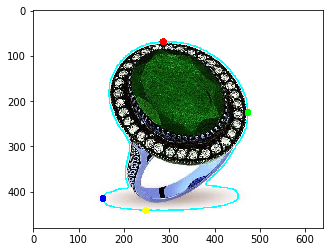

In [5]:
#third try
import imutils 

image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11, 11), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
 
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)
    
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
 
# show the output image
plt.imshow(image)
plt.show()

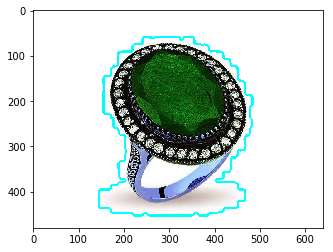

In [6]:
#fourth try 
image = cv2.imread('1.jpg')
#cv2.imshow("Image", image)
newImage = image.copy()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blurred = cv2.GaussianBlur(hsv, (3, 3), 0)

h,s,v = cv2.split(blurred)


thresh = cv2.adaptiveThreshold(h, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,4)


cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)
    

# use polylines

vrx = c.reshape((-1,1,2))
img = cv2.polylines(image, [vrx], True, (0,255,255),3)
plt.imshow(img)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

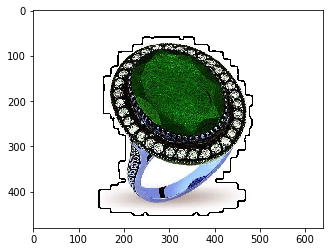

In [7]:
#fifth try 
image = cv2.imread('1.jpg')
#cv2.imshow("Image", image)
newImage = image.copy()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blurred = cv2.GaussianBlur(hsv, (3, 3), 0)

h,s,v = cv2.split(blurred)


thresh = cv2.adaptiveThreshold(h, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,4)


(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)

mask = np.ones(image.shape[:2], dtype="uint8") * 255

if len(cnts) > 0:
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

cv2.drawContours(mask, [c], -1, (0, 255, 255), 2)

image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(mask)
plt.imshow(image)
plt.show


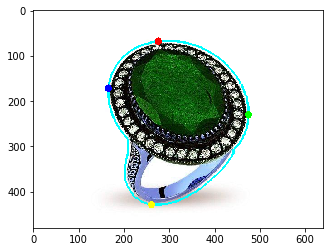

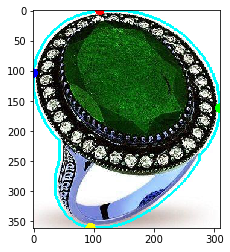

In [8]:
#best one with ROI below
image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(11,11),0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
thresh = cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations=15)
thresh = cv2.erode(thresh, np.ones((5,5),np.uint8), iterations=5)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

vrx = c.reshape((-1,1,2))
img = cv2.polylines(image, [vrx], True, (0,255,255),3)

cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img, extRight, 8, (0, 255, 0), -1)
cv2.circle(img, extTop, 8, (255, 0, 0), -1)
cv2.circle(img, extBot, 8, (255, 255, 0), -1)


plt.imshow(img)
plt.show()




x, y, w, h = cv2.boundingRect(c) 
    
# Getting ROI 
roi = img[y:y+h, x:x+w] 
plt.imshow(roi)
plt.show()


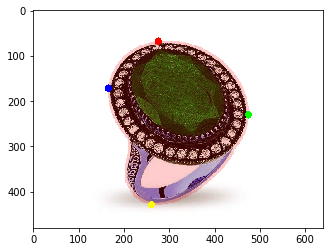

In [9]:
#masked version with extreme points
image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(11,11),0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
thresh = cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations=15)
thresh = cv2.erode(thresh, np.ones((5,5),np.uint8), iterations=5)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

x_Left = tuple(c[c[:, :, 0].argmin()][0])
x_Right = tuple(c[c[:, :, 0].argmax()][0])
y_Top = tuple(c[c[:, :, 1].argmin()][0])
y_Bot = tuple(c[c[:, :, 1].argmax()][0])


overlay = image.copy()
output = image.copy()

img=cv2.fillPoly(overlay,[c],250)
img2=cv2.addWeighted(img, 0.2, output, 1 - 0.2,0, output)
cv2.circle(img2, x_Left, 8, (0, 0, 255), -1)
cv2.circle(img2, x_Right, 8, (0, 255, 0), -1)
cv2.circle(img2, y_Top, 8, (255, 0, 0), -1)
cv2.circle(img2, y_Bot, 8, (255, 255, 0), -1)


plt.imshow(img2)
plt.show()


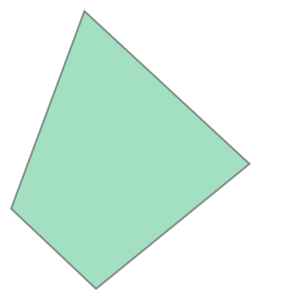

In [11]:
#masked version with extreme points
from skimage import measure 
from shapely.geometry import Polygon, MultiPolygon

image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(11,11),0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)
thresh = cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations=15)
thresh = cv2.erode(thresh, np.ones((5,5),np.uint8), iterations=5)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

x_Left = tuple(c[c[:, :, 0].argmin()][0])
x_Right = tuple(c[c[:, :, 0].argmax()][0])
y_Top = tuple(c[c[:, :, 1].argmin()][0])
y_Bot = tuple(c[c[:, :, 1].argmax()][0])

cont=(x_Left,y_Top,x_Right,y_Bot)

Polygon(cont)
